# Meissner effect in one dimension

Programs to solve the GL BVP with an applied field H at x=0 of half infinite superconductor in region x&gt;0.

In [1]:
%pip install scipy
import numpy as np
from scipy.integrate import solve_bvp
import matplotlib.pyplot as plt
from html.entities import html5

# London boundary conditions: b=da=b0,f=0 at x=0; b=da=0,f=1  at x=L, 
def gl(kappa,L,b0):
  def fun(x,y):
    f = y[0]
    df = y[1]
    a=y[2]
    da=y[3]
    return np.vstack((df, kappa*kappa*f*(f**2+a**2-1),da,a*f**2))
  def bc(ya, yb):
    return np.array([ya[0], yb[0]-1, ya[3]-b0,yb[3]+yb[2]])
  rng=[0, L]
  x = np.linspace(*rng, 20)
  y = np.zeros((4, x.size))
  for k in range(x.size): # initialize f to 1
    y[0,k]=1
  sol = solve_bvp(fun, bc, x, y)
  x_plot = np.linspace(*rng, 100)
  y_plot = sol.sol(x_plot)[0] # f
  plt.plot(x_plot, y_plot)
  y_plot = sol.sol(x_plot)[3] # b=da
  plt.plot(x_plot, y_plot)
  return 0

Looking in indexes: https://pypi.org/simple, https://www.piwheels.org/simple


Note: you may need to restart the kernel to use updated packages.


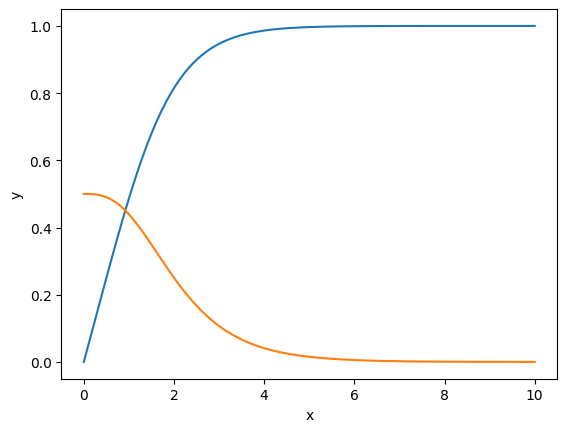

In [2]:
kappa=1
L=10
b0=0.5

gl(kappa,L,b0)
plt.xlabel("x")
plt.ylabel("y")
plt.show()